# Mini Project 3, Machine Learning
----
Prepared By, <br/>
Md Shahnawaz Ahmed<br/>
ID: 2301640<br/>
Abo Akademi University

# Imports

In [1]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import time

# Import Data

## Main Data

In [2]:
x_train = pd.read_csv('https://raw.githubusercontent.com/shahnawazdaanish/student_grades_predictor/main/X_train.txt', header=None, delim_whitespace=True)
x_test = pd.read_csv('https://github.com/shahnawazdaanish/student_grades_predictor/raw/main/X_test.txt', header=None, delim_whitespace=True)

x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### Checking shape

In [3]:
print(x_train.shape)
print(x_test.shape)

(7352, 561)
(2947, 561)


In [4]:
print('No of duplicates in train: {}'.format(sum(x_train.duplicated())))
print('No of duplicates in test : {}'.format(sum(x_test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


### Merging main test and train data

In [5]:
frames = [x_train, x_test]
df = pd.concat(frames, ignore_index=True)


df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Label Data

In [6]:
y_train = pd.read_csv('https://raw.githubusercontent.com/shahnawazdaanish/student_grades_predictor/main/y_train.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('https://github.com/shahnawazdaanish/student_grades_predictor/raw/main/y_test.txt', header=None, delim_whitespace=True)

y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


### Checking Shape

In [7]:
print(y_train.shape)
print(y_test.shape)

(7352, 1)
(2947, 1)


### Merging Labels of test and train

In [8]:
y_frames = [y_train, y_test]
Y = pd.concat(y_frames, ignore_index=True)

In [9]:
Y.head()

,0
0,5
1,5
2,5
3,5
4,5


## Checking Merged Shape

In [10]:
df.shape

(10299, 561)

In [10]:
Y.shape

(10299, 1)

### Checking unique values in label

In [11]:
Y.value_counts()

6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
dtype: int64

# EDA & Preprocessing

## Data Analysis

In [12]:
print("number of Rows (X)", df.shape[0])
print("number of Columns (X)", df.shape[1])
print("number of Rows (Y)", Y.shape[0])
print("number of Columns (Y)", Y.shape[1])

number of Rows (X) 10299
number of Columns (X) 561
number of Rows (Y) 10299
number of Columns (Y) 1


In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Label distribution

<ipython-input-14-dd29a2b444b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y[0], order=label_counts.index, palette='viridis')


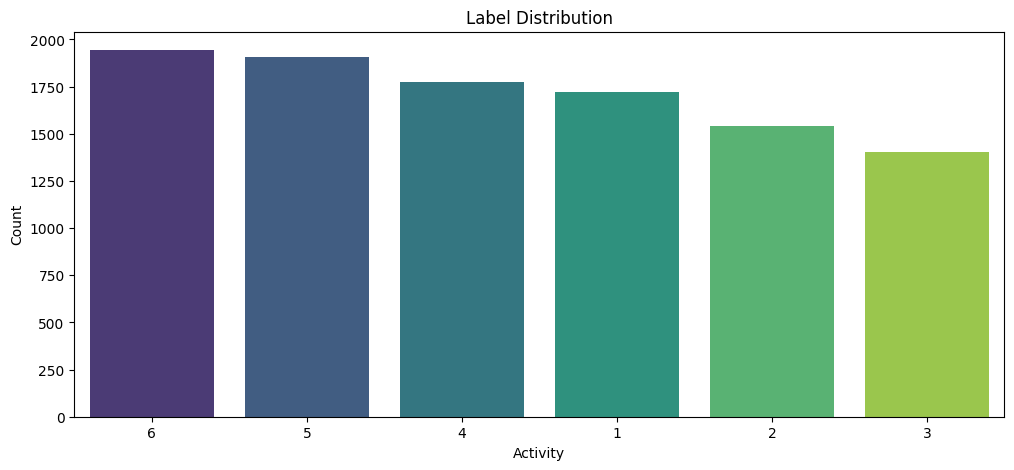

In [14]:
label_counts = Y[0].value_counts()

plt.figure(figsize=(12, 5))
sns.countplot(x=Y[0], order=label_counts.index, palette='viridis')

plt.title('Label Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

## Data Cleaning

### Check Duplicate

In [15]:
df.duplicated().sum()

0

In [16]:
df.duplicated().any()

False

### Check Null

In [18]:
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [17]:
if np.sum(df.isnull().sum()) == 0:
    print('There is no missing data!')
else:
    print('There is {} missing data!'.format(df.isnull().sum()))

There is no missing data!


# KMeans and PCA Analaysis

## KMeans

In [18]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

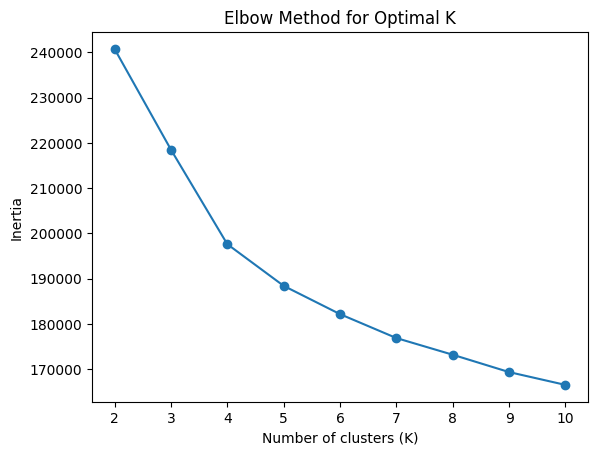

In [20]:
# Plot the Elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Using elbow method, we can see that optimal value for K is 4

In [21]:
optimal_k = 4

In [22]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We are taking n_neighbors 12 because we have 6 labels and it will be 2 * dimension = 12

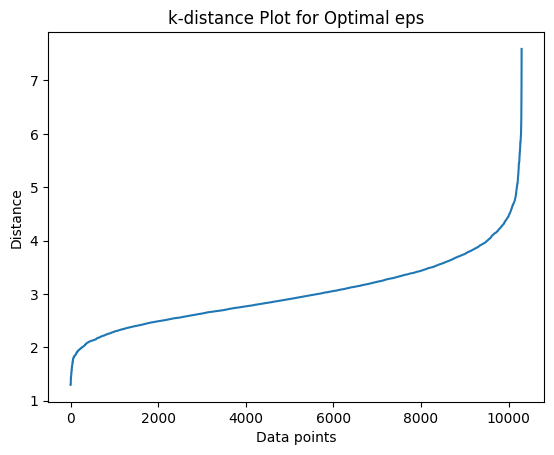

In [23]:
neigh = NearestNeighbors(n_neighbors=2)
distances, _ = neigh.fit(df).kneighbors(df)

# Sort and plot the distances
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('k-distance Plot for Optimal eps')
plt.show()

**Note:** eps value is between 4 and 5. Though fraction doesn't count as cluster, still we will take 4 as optimal eps

In [24]:
optimal_eps = 4

In [25]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=10)
labels_dbscan = dbscan.fit_predict(df)

## PCA Elbow Method

In [26]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

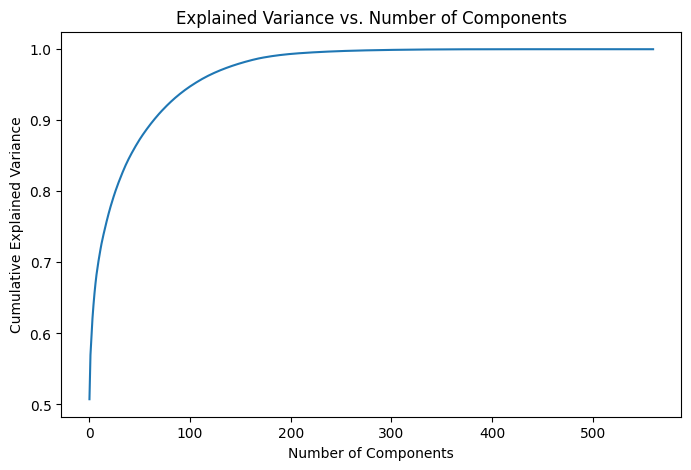

In [27]:
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

**Note:** We can see the number of components is around 100. So, we will take it in to consideration to calculate further.

In [28]:
n_components = 100
pca_com = PCA(n_components=n_components)
X_pca = pca_com.fit_transform(X_scaled)

print('Explained variance by components: ', pca_com.explained_variance_ratio_)

Explained variance by components:  [0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228 0.00858304 0.0080998
 0.00765863 0.00676668 0.00630242 0.00615718 0.00595335 0.00577195
 0.00563431 0.0054083  0.00518828 0.00502742 0.00473229 0.00463818
 0.00446848 0.00439868 0.00416863 0.00400809 0.00389071 0.00381337
 0.00366869 0.00364356 0.00349223 0.00346734 0.00335536 0.0032941
 0.00323823 0.00300506 0.00294252 0.00290449 0.00275764 0.00269857
 0.00264192 0.00258022 0.00255025 0.00247768 0.00245522 0.00238271
 0.00235891 0.00232031 0.0022835  0.00219118 0.00212595 0.00209105
 0.00203425 0.00201132 0.00198079 0.00194363 0.00192409 0.0018942
 0.00186257 0.00182855 0.00180867 0.00176285 0.001741   0.00171383
 0.00170958 0.00167293 0.00163441 0.00161344 0.00160241 0.00156191
 0.00149993 0.00148535 0.0014834  0.00144259 0.0014359  0.00141745
 0.00140574 0.00135527 0.0013249  0.00131865 0.00130656 0.0012806
 0.00126264 0.00123249 0.001208

In [29]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [30]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,-16.380980,1.995083,3.415692,-0.649858,7.825070,-2.771976,2.298296,5.227712,-1.335395,-3.760152,...,-0.236859,-0.355071,-0.377769,-0.323707,0.488886,1.190798,1.975072,-1.546329,1.338014,-0.298215
1,-15.582173,1.182594,-0.321206,2.748083,4.729535,-1.588827,-0.334054,1.621187,-0.006340,0.072043,...,-0.410014,0.035489,-0.499070,-0.811090,-0.929071,0.283431,0.361561,0.834508,0.127911,-0.781964
2,-15.423989,2.243166,-1.237783,4.002881,4.402738,-1.035092,-0.129767,1.279178,0.190810,-0.780943,...,-0.950480,-0.877875,-0.804167,-0.208286,1.095334,-0.525135,0.809752,0.753380,0.450906,-0.540694
3,-15.647807,3.762882,-1.275283,2.806663,3.239112,-0.743530,0.326073,1.742964,0.912245,-1.594786,...,-0.726814,0.759394,0.076676,1.201239,-0.597520,0.333281,0.798483,0.257709,0.256858,-0.233516
4,-15.842320,4.438897,-1.808231,3.160508,3.331169,-0.911555,-0.861932,0.090139,0.521617,1.015955,...,-0.275115,-0.617900,-1.023754,0.217414,-0.337669,0.523393,0.155943,-0.042783,-0.007397,-0.387813


In [31]:
print(pca_df.shape)
print(Y.shape)

(10299, 100)
(10299, 1)


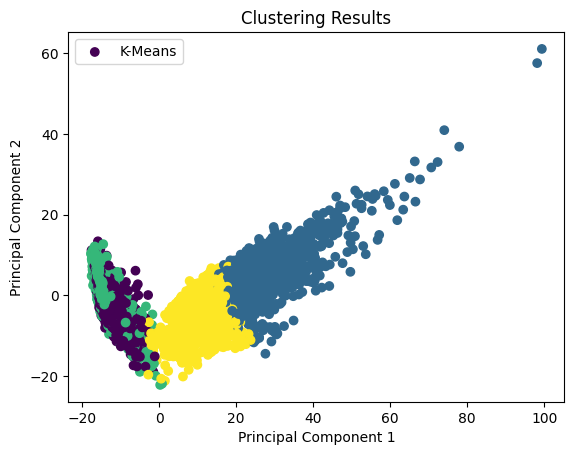

In [32]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', label='K-Means')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()

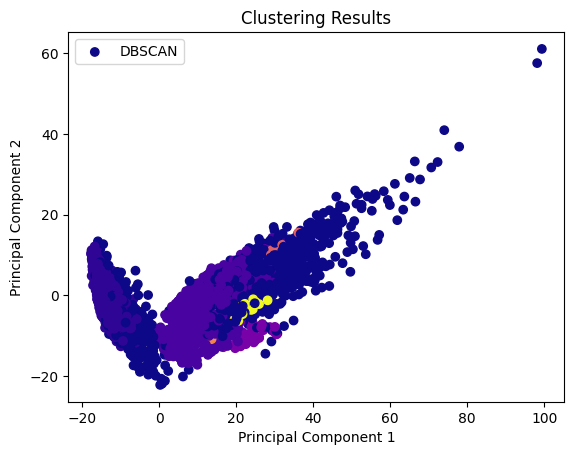

In [33]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='plasma', label='DBSCAN')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()

**Note:** So, we are getting 4 clusters for K-Means and 4 Clusters for DBScan

# Comparison and Result Evaluation

## Checking Performance against time taken

In [34]:
start_time = time.time()
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans_no_pca = kmeans.fit_predict(pca_df)
elapsed_time_no_pca = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
start_time = time.time()
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans_pca = kmeans.fit_predict(X_pca)
elapsed_time_pca = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Task 3 - Visualization

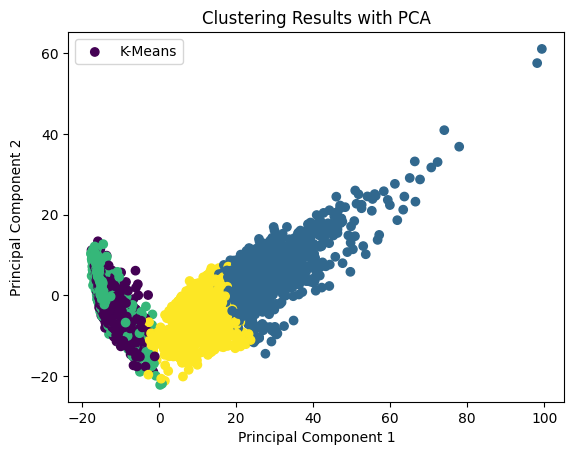

In [57]:
# Visualize clustering results with PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', label='K-Means')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results with PCA')
plt.show()

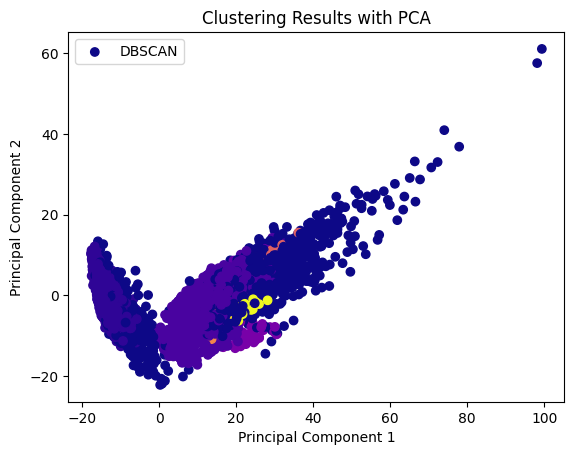

In [58]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='plasma', label='DBSCAN')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results with PCA')
plt.show()

In [36]:
print(f"Time taken without dimensionality reduction: {elapsed_time_no_pca} seconds")
print(f"Time taken with dimensionality reduction: {elapsed_time_pca} seconds")

Time taken without dimensionality reduction: 2.9473438262939453 seconds
Time taken with dimensionality reduction: 1.655029535293579 seconds


**Note:** As we can see, without dimensionality reduction it is taking more time for making those clusters.

## Calculating Silhouette Score

In [38]:
# Calculate Silhouette Score without dimensionality reduction
silhouette_score_no_pca = silhouette_score(df, labels_kmeans_no_pca)

# Calculate Silhouette Score with dimensionality reduction
silhouette_score_pca = silhouette_score(X_pca, labels_kmeans_pca)

print(f"Silhouette Score without dimensionality reduction: {silhouette_score_no_pca}")
print(f"Silhouette Score with dimensionality reduction: {silhouette_score_pca}")

Silhouette Score without dimensionality reduction: 0.15111834957148604
Silhouette Score with dimensionality reduction: 0.1641367811147802


**Note:** As we also can see, Silhouette Score with dimensionality reduction performed better with higher score compared to without dimensionality reduction.